# Introduction to Computer Vision: Plant Seedlings Classification

## Problem Statement

### Context

In recent times, the field of agriculture has been in urgent need of modernizing, since the amount of manual work people need to put in to check if plants are growing correctly is still highly extensive. Despite several advances in agricultural technology, people working in the agricultural industry still need to have the ability to sort and recognize different plants and weeds, which takes a lot of time and effort in the long term. The potential is ripe for this trillion-dollar industry to be greatly impacted by technological innovations that cut down on the requirement for manual labor, and this is where Artificial Intelligence can actually benefit the workers in this field, as **the time and energy required to identify plant seedlings will be greatly shortened by the use of AI and Deep Learning.** The ability to do so far more efficiently and even more effectively than experienced manual labor, could lead to better crop yields, the freeing up of human inolvement for higher-order agricultural decision making, and in the long term will result in more sustainable environmental practices in agriculture as well.


### Objective

The aim of this project is to Build a Convolutional Neural Netowrk to classify plant seedlings into their respective categories.

### Data Dictionary

The Aarhus University Signal Processing group, in collaboration with the University of Southern Denmark, has recently released a dataset containing **images of unique plants belonging to 12 different species.**

- The dataset can be download from Olympus.
- The data file names are:
    - images.npy
    - Labels.csv
- Due to the large volume of data, the images were converted to the images.npy file and the labels are also put into Labels.csv, so that you can work on the data/project seamlessly without having to worry about the high data volume.

- The goal of the project is to create a classifier capable of determining a plant's species from an image.

**List of Species**

- Black-grass
- Charlock
- Cleavers
- Common Chickweed
- Common Wheat
- Fat Hen
- Loose Silky-bent
- Maize
- Scentless Mayweed
- Shepherds Purse
- Small-flowered Cranesbill
- Sugar beet

### **Note: Please use GPU runtime on Google Colab to execute the code faster.**

## Importing necessary libraries

In [1]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
!pip install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 opencv-python==4.8.0.76 -q --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 58.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 38.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 48.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 25.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 45.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 k

In [ ]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
#!pip install tensorflow==2.13.0 scikit-learn==1.2.2 seaborn==0.11.1 matplotlib==3.3.4 numpy==1.24.3 pandas==1.5.2 opencv-python==4.8.0.76 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [2]:
import os
import numpy as np                                                                               # Importing numpy for Matrix Operations
import pandas as pd                                                                              # Importing pandas to read CSV files
import matplotlib.pyplot as plt                                                                  # Importting matplotlib for Plotting and visualizing images
import math                                                                                      # Importing math module to perform mathematical operations
import cv2                                                                                       # Importing openCV for image processing
import seaborn as sns                                                                            # Importing seaborn to plot graphs


# Tensorflow modules
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator                              # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential                                                   # Importing the sequential module to define a sequential model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization # Defining all the layers to build our CNN Model
from tensorflow.keras.optimizers import Adam,SGD                                                 # Importing the optimizers which can be used in our model
from sklearn import preprocessing                                                                # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix                                                     # Importing confusion_matrix to plot the confusion matrix
from sklearn.preprocessing import LabelBinarizer
# Display images using OpenCV
from google.colab.patches import cv2_imshow                                                      # Importing cv2_imshow from google.patches to display images
from sklearn.model_selection import train_test_split
from tensorflow.keras import backend
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

import random
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load the image file of dataset
images = np.load('/content/drive/MyDrive/Python File/Computer Vision/images.npy')

# Load the labels file of dataset
labels = pd.read_csv('/content/drive/MyDrive/Python File/Computer Vision/Labels.csv')

## Data Overview

**Print first five lines of labels**

In [5]:
labels.head()

,Label
0,Small-flowered Cranesbill
1,Small-flowered Cranesbill
2,Small-flowered Cranesbill
3,Small-flowered Cranesbill
4,Small-flowered Cranesbill


**Obtain unique values for lables**

In [6]:
labels.nunique()

,0
Label,12


### Understand the shape of the dataset

In [7]:
print(labels.shape)
print(images.shape)

(4750, 1)
(4750, 128, 128, 3)


There are 4750 images of 128 x 128 pixels, 3 channels

## Exploratory Data Analysis

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you understand the data better.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

### Plotting random images from each of the class

1. **How are these different category plant images different from each other?**


**Plot sample image of each category**

In [9]:
def plot_images(images,labels):
  categories=np.unique(labels)
  keys=dict(labels['Label'])                                                      # Obtaing the unique classes from y_train
  rows = 3                                                                        # Defining number of rows=3
  cols = 4                                                                        # Defining number of columns=4
  fig = plt.figure(figsize=(10, 8))                                               # Defining the figure size to 10x8
  for i in range(cols):
      for j in range(rows):
          random_index = np.random.randint(0, len(labels))                        # Generating random indices from the data and plotting the images
          ax = fig.add_subplot(rows, cols, i * rows + j + 1)                      # Adding subplots with 3 rows and 4 columns
          ax.imshow(images[random_index, :])                                      # Plotting the image
          ax.set_title(keys[random_index])
  plt.show()

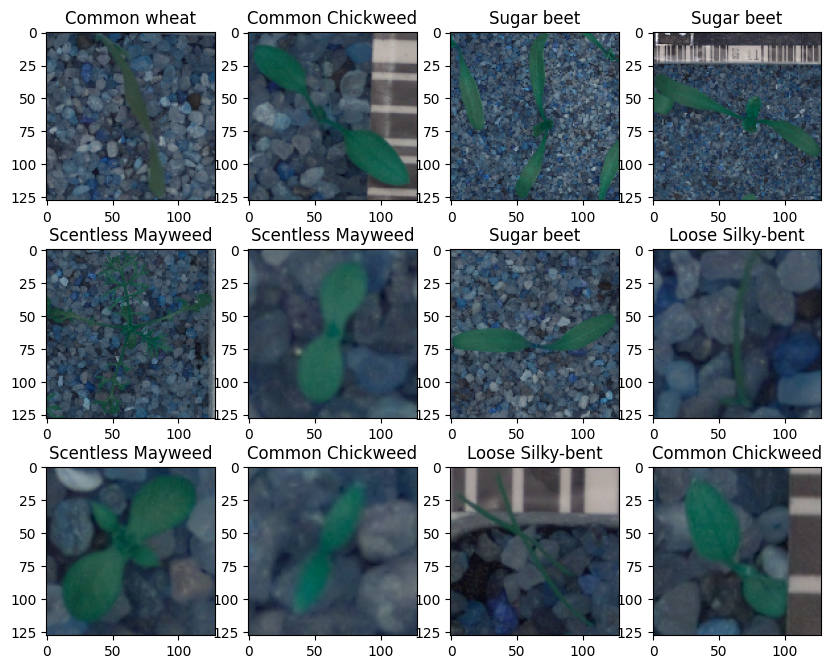

In [10]:
plot_images(images,labels)

2. **Is the dataset provided an imbalance? (Check with using bar plots)**

**Distribution of samples of different classes**

In [11]:
labels.value_counts()

,count
Label,
Loose Silky-bent,654
Common Chickweed,611
Scentless Mayweed,516
Small-flowered Cranesbill,496
Fat Hen,475
Charlock,390
Sugar beet,385
Cleavers,287
Black-grass,263


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Small-flowered Cranesbill'),
  Text(1, 0, 'Fat Hen'),
  Text(2, 0, 'Shepherds Purse'),
  Text(3, 0, 'Common wheat'),
  Text(4, 0, 'Common Chickweed'),
  Text(5, 0, 'Charlock'),
  Text(6, 0, 'Cleavers'),
  Text(7, 0, 'Scentless Mayweed'),
  Text(8, 0, 'Sugar beet'),
  Text(9, 0, 'Maize'),
  Text(10, 0, 'Black-grass'),
  Text(11, 0, 'Loose Silky-bent')])

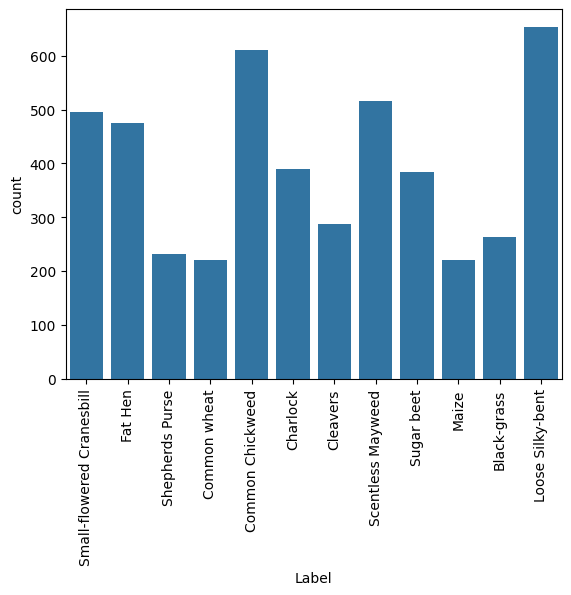

In [12]:
sns.countplot(x=labels['Label'])
plt.xticks(rotation='vertical')

Observation:

*  **Loose Silky bent** plant has most samples among the different plant species
*  Least plant samples are for **Common Wheat** and **Maize**

## Data Pre-Processing

### Convert the BGR images to RGB images.

In [14]:
images_copy = images.copy()

**Display sample image**

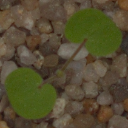

In [15]:
original_img = images_copy[20]
cv2_imshow(original_img)

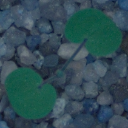

In [16]:
# Convert to RGB image
rgbImg = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
cv2_imshow(rgbImg)

### Resize the images

As the size of the images is large, it may be computationally expensive to train on these larger images; therefore, it is preferable to reduce the image size from 128 to 64.

Original Image of size 128X128


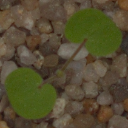



Converted to RGB Resized to 50%


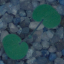



Converted to RGB Resized to 50% and applied Gaussian Blurring with kernel size 3X3


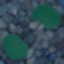

In [28]:
img = cv2.resize(rgbImg,None,fx=0.50,fy=0.50)

#Applying Gaussian Blur
img_g = cv2.GaussianBlur(img,(3,3),0)

#Displaying preprocessed and original images
print("Original Image of size 128X128")
cv2_imshow(original_img)
print('\n')
print("Converted to RGB Resized to 50%")
cv2_imshow(img)
print('\n')
print("Converted to RGB Resized to 50% and applied Gaussian Blurring with kernel size 3X3")
cv2_imshow(img_g)

**Converting to HSV and applying mask for the background and focusing only on plant**

We can further benefit from changing the image to HSV and then focussing

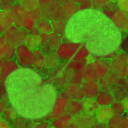

In [29]:
hsvImg = cv2.cvtColor(original_img, cv2.COLOR_BGR2HSV)
cv2_imshow(hsvImg)

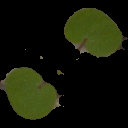

In [19]:
# Create mask (parameters - green color range)
lower_green = (25, 40, 50)
upper_green = (75, 255, 255)
mask = cv2.inRange(hsvImg, lower_green, upper_green)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

# Create bool mask
bMask = mask > 0

# Apply the mask
clearImg = np.zeros_like(original_img, np.uint8)  # Create empty image
clearImg[bMask] = original_img[bMask]  # Apply boolean mask to the origin image

#Masked Image after removing the background
cv2_imshow(clearImg)

**Applying Resize, Gaussian Blurr and Masking on All Images Images converted to HSV**



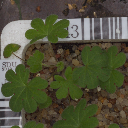

Original Image of size 128X128


Converted to HSV, Resized to 50%, applied Gaussian Blur and Masking


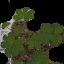

In [30]:
converted_images = []
for i in range(len(images_copy)):
  resize_i = cv2.resize(images_copy[i], None, fx=0.50, fy=0.50)
  img_g = cv2.GaussianBlur(resize_i,(3,3),0)
  hsv_i = cv2.cvtColor(img_g, cv2.COLOR_BGR2HSV)
  mask = cv2.inRange(hsv_i, lower_green, upper_green)
  mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
  bMask = mask > 0
  clearImg = np.zeros_like(resize_i, np.uint8)  # Create empty image
  clearImg[bMask] = resize_i[bMask]  # Apply boolean mask to the original image
  converted_images.append(clearImg)


cv2_imshow(images_copy[3])
print("Original Image of size 128X128")
print('\n')
print("Converted to HSV, Resized to 50%, applied Gaussian Blur and Masking")
cv2_imshow(converted_images[3])

converted_images = np.asarray(converted_images)


**Plot sample images for each category**

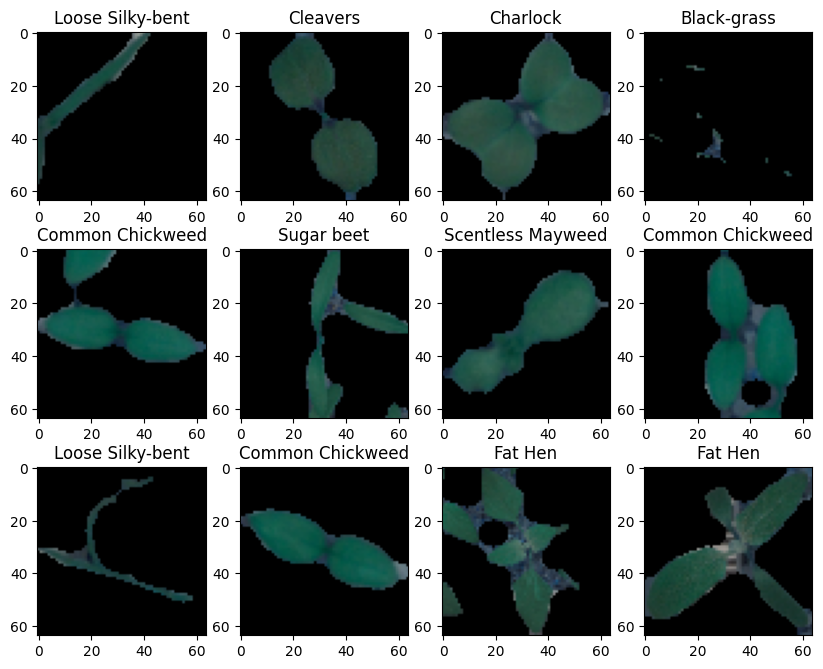

In [21]:
plot_images(converted_images,labels)

In [22]:
converted_images.shape


(4750, 64, 64, 3)

There are 4750 converted images each 64 X 64 pixels and 3 channels.

### Data Preparation for Modeling

- Before you proceed to build a model, you need to split the data into train, test, and validation to be able to evaluate the model that you build on the train data
- You'll have to encode categorical features and scale the pixel values.
- You will build a model using the train data and then check its performance

**Split the dataset**

In [31]:
from sklearn.model_selection import train_test_split
X_temp, X_test, y_temp, y_test = train_test_split(converted_images,labels, test_size=0.1, random_state=42,stratify=labels)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1, random_state=42,stratify=y_temp)

In [32]:
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_val shape: ", X_val.shape)
print("y_val shape: ", y_val.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (3847, 64, 64, 3)
y_train shape:  (3847, 1)
X_val shape:  (428, 64, 64, 3)
y_val shape:  (428, 1)
X_test shape:  (475, 64, 64, 3)
y_test shape:  (475, 1)


### Encode the target labels

In [25]:
# Convert labels from names to one hot vectors.
# Labelbinarizer works similar to onehotencoder

from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y_train_encoded = enc.fit_transform(y_train) # encode training labels data
y_val_encoded=enc.transform(y_val) # encode validation labels data
y_test_encoded=enc.transform(y_test) # encode test labels data

Print Sample of encoded data

In [26]:
y_val_encoded.shape
y_val_encoded[0]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

### Data Normalization

In [27]:
# Normalizing the image pixels
X_train_normalized = X_train.astype('float32')/255.0
X_val_normalized = X_val.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0

Print sample

In [33]:
X_train_normalized[0]

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

## Model Building

Let's build a CNN Model with the following 2 main parts -

1. The Feature Extraction layers which are comprised of convolutional and pooling layers.
2. The Fully Connected classification layers for prediction.

In [ ]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [ ]:
# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
def construct_model():
    # Intializing a sequential model
    model = Sequential()

    # Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
    # Input_shape denotes input image dimension of images
    model.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

    # Adding max pooling to reduce the size of output of first conv layer
    model.add(MaxPooling2D((2, 2), padding = 'same', strides=(2, 2)))

    model.add(BatchNormalization()) # Normalize the activations of the previous layer at each batch
    model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), activation='relu'))
    model.add(BatchNormalization())


    model.add(Conv2D(32, (3, 3), activation='relu', padding="same", strides=(1, 1)))
    model.add(BatchNormalization())

    model.add(MaxPooling2D((2, 2), padding = 'same', strides=(2, 2),))

    model.add(Conv2D(32, (3, 3), activation='relu', padding="valid", strides=(1, 1)))
    model.add(BatchNormalization())

    model.add(MaxPooling2D((2, 2), padding = 'same', strides=(2, 2)))

    model.add(Conv2D(filters=16, kernel_size=(3, 3), strides=(1, 1), activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=16, kernel_size=(3, 3), strides=(1, 1), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # flattening the output of the conv layer after max pooling to make it ready for creating dense connections
    model.add(Flatten())

    # Adding a fully connected layer with 256 neurons
    model.add(Dense(units = 256, activation = 'relu'))

    # Adding dropout with probability 0.2 to reduce overfitting
    model.add(Dropout(0.2))
    model.add(Dense(units = 12, activation = 'softmax'))
    # Using Adam Optimizer
    opt = Adam(learning_rate=0.002, beta_1=0.9, beta_2=0.999, epsilon=0.1, decay=0.0)
    # Compile model
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

    # Generating the summary of the model
    model.summary()
    return model

* **Filters**: Number of filters in the first hidden layer.This is also called as **Kernel**
* **Kernel_Size**: The kernel size here refers to the widthxheight of the filter mask.
* **Padding**: The padding type is called SAME because the output size is the same as the input size(when stride=1). Using 'SAME' ensures that the filter is applied to all the elements of the input. Normally, padding is set to "SAME" while training the model. Output size is mathematically convenient for further computation.
* **MaxPool2D**: Max Pooling is a pooling operation that calculates the maximum value for patches of a feature map, and uses it to create a downsampled (pooled) feature map. It is usually used after a convolutional layer.
* **Flatten**: Flattening is converting the data into a 1-dimensional array for inputting it to the next layer. We flatten the output of the convolutional layers to create a single long feature vector. And it is connected to the final classification model, which is called a fully-connected layer.

### Model 1

In [ ]:
model_1 = construct_model()
history_1 = model_1.fit(
            X_train_normalized, y_train_encoded,
            epochs=30,
            validation_data=(X_val_normalized,y_val_encoded),
            batch_size=32,
            verbose=2
)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 30, 30, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 30, 30, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 30, 30, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 30, 30, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 13, 13, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 13, 13, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 5, 5, 16)            │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 5, 5, 16)            │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 3, 3, 16)            │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 3, 3, 16)            │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 1, 1, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │           4,352 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 81,708 (319.17 KB)

 Trainable params: 81,260 (317.42 KB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/30
121/121 - 100s - 824ms/step - accuracy: 0.1578 - loss: 2.4023 - val_accuracy: 0.1121 - val_loss: 2.4731
Epoch 2/30
121/121 - 135s - 1s/step - accuracy: 0.3475 - loss: 2.0191 - val_accuracy: 0.1542 - val_loss: 2.4128
Epoch 3/30
121/121 - 80s - 658ms/step - accuracy: 0.4403 - loss: 1.7038 - val_accuracy: 0.2313 - val_loss: 2.2883
Epoch 4/30
121/121 - 91s - 756ms/step - accuracy: 0.5204 - loss: 1.4560 - val_accuracy: 0.2360 - val_loss: 2.2046
Epoch 5/30
121/121 - 118s - 973ms/step - accuracy: 0.5776 - loss: 1.2712 - val_accuracy: 0.4907 - val_loss: 1.5567
Epoch 6/30
121/121 - 84s - 692ms/step - accuracy: 0.6324 - loss: 1.1187 - val_accuracy: 0.5467 - val_loss: 1.2689
Epoch 7/30
121/121 - 80s - 662ms/step - accuracy: 0.6857 - loss: 0.9612 - val_accuracy: 0.5164 - val_loss: 1.4917
Epoch 8/30
121/121 - 69s - 572ms/step - accuracy: 0.7169 - loss: 0.8576 - val_accuracy: 0.4533 - val_loss: 1.7436
Epoch 9/30
121/121 - 80s - 664ms/step - accuracy: 0.7497 - loss: 0.7643 - val_accuracy: 

***CNN Model layer summary:***

* Convolutional input layers with 64 feature maps with a size of 3X3 and a  rectifier activation function
* Batch Normalization
* Max Pool layer with size 2×2 and a stride of 2
* Convolutional layer, 64 feature maps with a size of 3X3 and a rectifier activation function.
* Batch Normalization
* Max Pool layer with size 2×2 and a stride of 2
* Convolutional layer, 32 feature maps with a size of 3X3 and a rectifier activation function.
* Batch Normalization
* Max Pool layer with size 2×2 and a stride of 2
* Convolutional layer, 32 feature maps with a size of 3X3 and a rectifier activation function.
* Batch Normalization
* Max Pool layer with size 2×2 and a stride of 2
* Convolutional layer, 16 feature maps with a size of 3X3 and a rectifier activation function.
* Batch Normalization
* Max Pool layer with size 2×2 and a stride of 2
* Convolutional layer, 16feature maps with a size of 3X3 and a rectifier activation function.
* Batch Normalization
* Max Pool layer with size 2×2 and a stride of 2
* Flatten layer
* Fully connected or Dense layer (with 256 neurons) with Relu Activation.
* Dropout layer to reduce overfitting or for regularization
* Output layer with Softwax function

As we can see from the above summary, this CNN model will train and learn **81,260** parameters (weights and biases).

**Plotting Accuracy vs Epoch Curve**

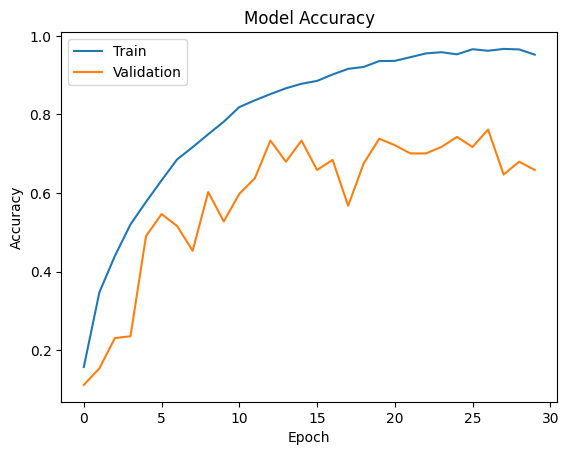

In [ ]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Best Model accuracy with least loss**

In [ ]:
best_model_accuracy = history_1.history['accuracy'][np.argmin(history_1.history['loss'])]
best_model_accuracy

0.965427577495575

**Testing accuracy**

In [ ]:
accuracy = model_1.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 3s - 195ms/step - accuracy: 0.7116 - loss: 1.0907


In [ ]:
y_pred=model_1.predict(X_test_normalized)

15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 211ms/step


**Confusion Matrix**

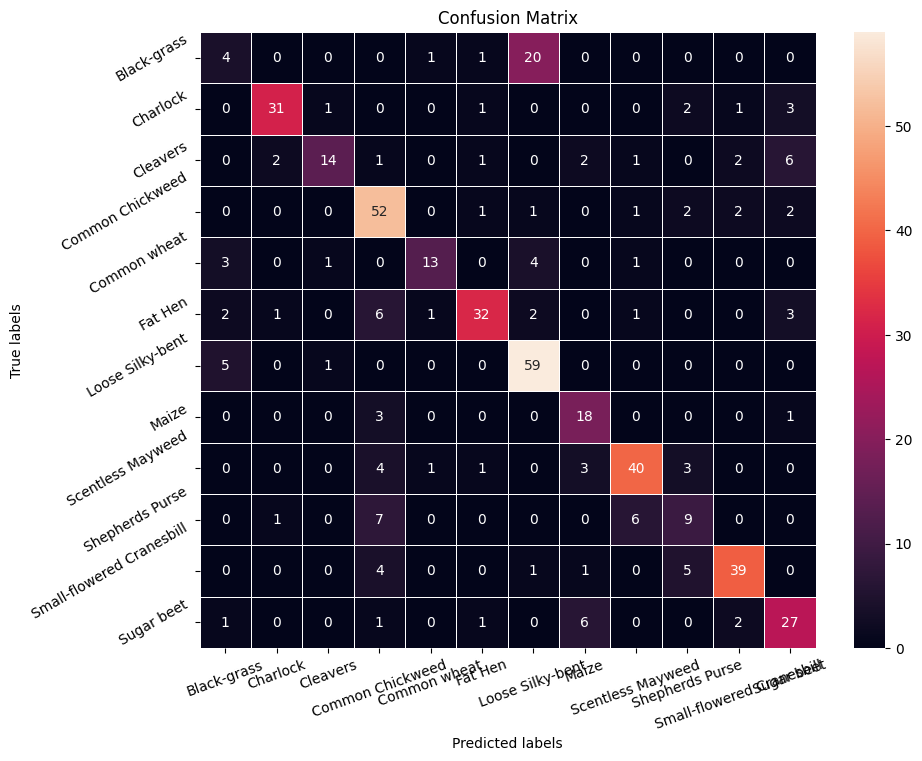

In [ ]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
# Setting the labels to both the axes
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(list(enc.classes_),rotation=20)
ax.yaxis.set_ticklabels(list(enc.classes_),rotation=30)
plt.show()

**Classification Report**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_arg,y_pred_arg))

              precision    recall  f1-score   support

           0       0.27      0.15      0.20        26
           1       0.89      0.79      0.84        39
           2       0.82      0.48      0.61        29
           3       0.67      0.85      0.75        61
           4       0.81      0.59      0.68        22
           5       0.84      0.67      0.74        48
           6       0.68      0.91      0.78        65
           7       0.60      0.82      0.69        22
           8       0.80      0.77      0.78        52
           9       0.43      0.39      0.41        23
          10       0.85      0.78      0.81        50
          11       0.64      0.71      0.68        38

    accuracy                           0.71       475
   macro avg       0.69      0.66      0.66       475
weighted avg       0.72      0.71      0.70       475



**Observations**

* We see that the difference between the training and validation accuracy is large, so the model seems to be overfitting.
* The training loss keeps decreasing with number of epochs but the validation loss is oscillating, it first decreases and then increases.
* The model has a test accuracy of 71%


**The model did not perform well for:**

* Black grass - 20 missclassified
* Common wheat
* Small flower cranesbill - 9 misclassified
* Cleavers - 15 missclassfied etc
* Shephers purse - 13 missclassified

## Model Performance Improvement

**Reducing the Learning Rate:**

**Hint**: Use **ReduceLRonPlateau()** function that will be used to decrease the learning rate by some factor, if the loss is not decreasing for some time. This may start decreasing the loss at a smaller learning rate. There is a possibility that the loss may still not decrease. This may lead to executing the learning rate reduction again in an attempt to achieve a lower loss.

In [ ]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [ ]:
# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)


### Model 1.1: CNN with Reducing Learning Rate

In [ ]:
model_1_1 = construct_model()
history_1_1 = model_1_1.fit(
            X_train_normalized, y_train_encoded,
            epochs=30,
            validation_data=(X_val_normalized, y_val_encoded),
            batch_size=32,
            callbacks=[learning_rate_reduction],
            verbose=2
)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 30, 30, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 30, 30, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 30, 30, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 30, 30, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 13, 13, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 13, 13, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 5, 5, 16)            │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 5, 5, 16)            │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 3, 3, 16)            │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 3, 3, 16)            │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 1, 1, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │           4,352 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 81,708 (319.17 KB)

 Trainable params: 81,260 (317.42 KB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/30
121/121 - 19s - 159ms/step - accuracy: 0.1700 - loss: 2.3940 - val_accuracy: 0.1472 - val_loss: 2.4694 - learning_rate: 0.0020
Epoch 2/30
121/121 - 1s - 9ms/step - accuracy: 0.3629 - loss: 1.9897 - val_accuracy: 0.1145 - val_loss: 2.4552 - learning_rate: 0.0020
Epoch 3/30
121/121 - 1s - 9ms/step - accuracy: 0.4393 - loss: 1.6982 - val_accuracy: 0.2150 - val_loss: 2.3380 - learning_rate: 0.0020
Epoch 4/30
121/121 - 1s - 11ms/step - accuracy: 0.5074 - loss: 1.4600 - val_accuracy: 0.2593 - val_loss: 2.1162 - learning_rate: 0.0020
Epoch 5/30
121/121 - 1s - 10ms/step - accuracy: 0.5768 - loss: 1.2693 - val_accuracy: 0.5257 - val_loss: 1.4401 - learning_rate: 0.0020
Epoch 6/30
121/121 - 1s - 10ms/step - accuracy: 0.6384 - loss: 1.0969 - val_accuracy: 0.5070 - val_loss: 1.4393 - learning_rate: 0.0020
Epoch 7/30
121/121 - 1s - 10ms/step - accuracy: 0.6779 - loss: 0.9630 - val_accuracy: 0.5654 - val_loss: 1.3754 - learning_rate: 0.0020
Epoch 8/30
121/121 - 1s - 11ms/step - accuracy: 

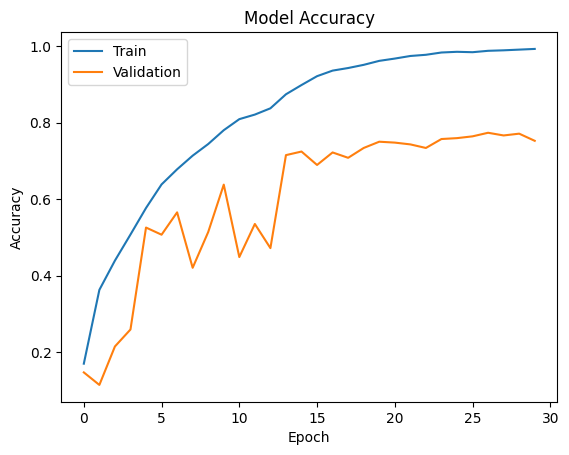

In [ ]:
plt.plot(history_1_1.history['accuracy'])
plt.plot(history_1_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Best Model Accuracy with least loss**

In [ ]:
best_model_accuracy = history_1_1.history['accuracy'][np.argmin(history_1_1.history['loss'])]
best_model_accuracy

0.9924616813659668

**Testing accuracy**

In [ ]:
accuracy = model_1_1.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 1s - 74ms/step - accuracy: 0.7495 - loss: 0.9048


In [ ]:
y_pred=model_1_1.predict(X_test_normalized)

15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step


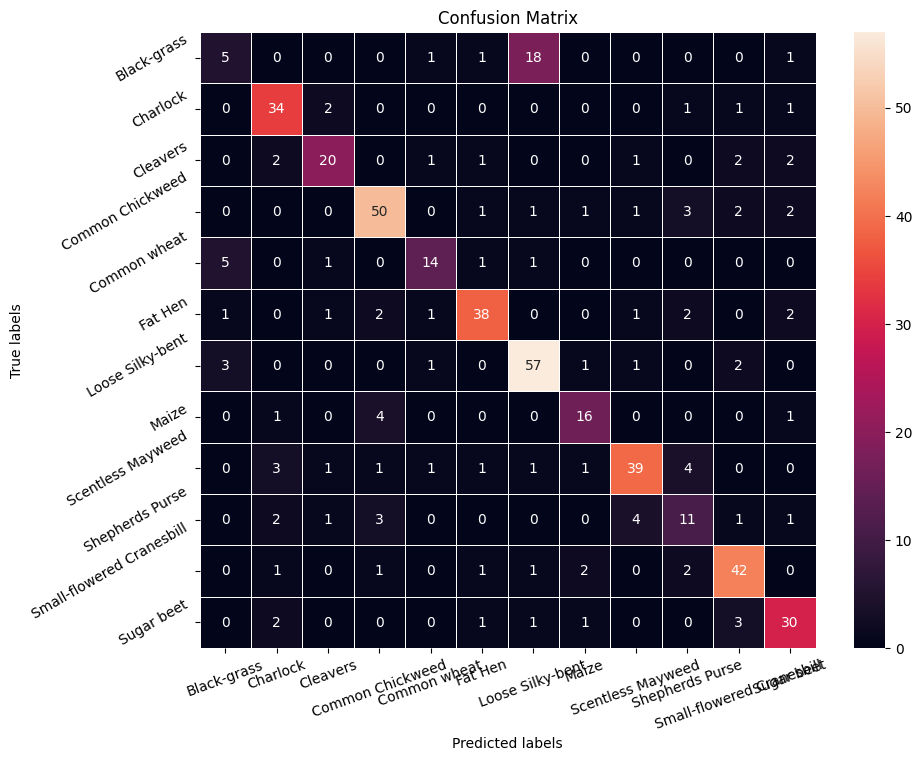

In [ ]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
# Setting the labels to both the axes
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(list(enc.classes_),rotation=20)
ax.yaxis.set_ticklabels(list(enc.classes_),rotation=30)
plt.show()

**Observations**

* The model still seems to be overfitting.
* The training accuracy improves with number of epochs but the difference between the training and validation performance is still large.
* Training loss decreases with number of epochs, validation loss plateaus off.
* This model still shows misclassification for Black grass, Common wheat, Shephards purse.

### **Data Augmentation**

Remember, **data augmentation should not be used in the validation/test data set**.

In [ ]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
train_datagen = ImageDataGenerator(
                              rotation_range=20,
                              fill_mode='nearest'
                              )

#### Model 2: CNN with Data Augmentation and Learing Rate Reduction

In [ ]:
# Epochs
epochs = 30
# Batch size
batch_size = 64

model_2 = construct_model()

history_2 = model_2.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=batch_size,
                                       seed=42,
                                       shuffle=False),
                    epochs=epochs,
                    steps_per_epoch=X_train_normalized.shape[0],
                    validation_data=(X_val_normalized, y_val_encoded),
                    callbacks=[learning_rate_reduction],
                    verbose=1)

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)                   │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_30               │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 30, 30, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_31               │ (None, 30, 30, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_32 (Conv2D)                   │ (None, 30, 30, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_32               │ (None, 30, 30, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_33 (Conv2D)                   │ (None, 13, 13, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_33               │ (None, 13, 13, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_34 (Conv2D)                   │ (None, 5, 5, 16)            │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_34               │ (None, 5, 5, 16)            │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_35 (Conv2D)                   │ (None, 3, 3, 16)            │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_35               │ (None, 3, 3, 16)            │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_23 (MaxPooling2D)      │ (None, 1, 1, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 256)                 │           4,352 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 81,708 (319.17 KB)

 Trainable params: 81,260 (317.42 KB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/30
3847/3847 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.1058 - loss: 2.5654 - val_accuracy: 0.0467 - val_loss: 2.4869 - learning_rate: 0.0020
Epoch 2/30
3847/3847 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.2162 - loss: 2.3029 - val_accuracy: 0.0794 - val_loss: 2.4976 - learning_rate: 0.0020
Epoch 3/30
3847/3847 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.3258 - loss: 2.0680 - val_accuracy: 0.1379 - val_loss: 2.5261 - learning_rate: 0.0020
Epoch 4/30
3847/3847 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.3798 - loss: 1.8739 - val_accuracy: 0.1379 - val_loss: 2.6126 - learning_rate: 0.0020
Epoch 5/30
3847/3847 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.4223 - loss: 1.7188 - val_accuracy: 0.1379 - val_loss: 2.6629 - learning_rate: 0.0020
Epoch 6/30
  61/3847 ━━━━━━━━━━━━━━━━━━━━ 5:54 94ms/step - accuracy: 0.4666 - loss: 1.5950
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0010000000474974513.
3847/3847 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.4873 

**Testing accuracy**

In [ ]:
accuracy = model_2.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 0s - 30ms/step - accuracy: 0.7221 - loss: 0.8131


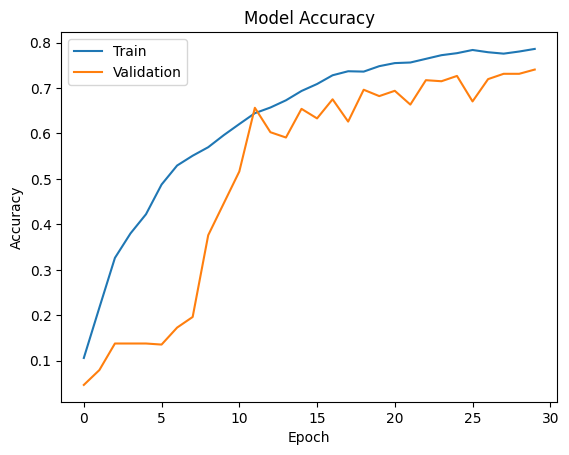

In [ ]:
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
y_pred=model_2.predict(X_test_normalized)

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step


**Best Model Accuracy with least loss**

In [ ]:
best_model_accuracy = history_2.history['accuracy'][np.argmin(history_2.history['loss'])]
best_model_accuracy

0.7860670685768127

**Confusion Matrix**

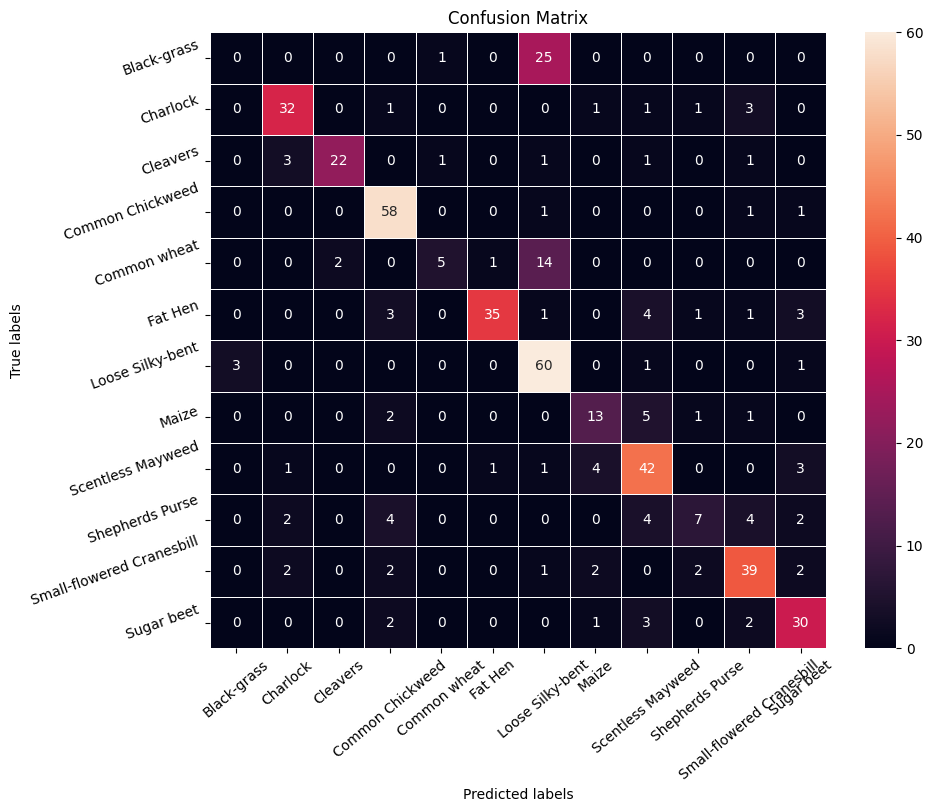

In [ ]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
# Setting the labels to both the axes
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(list(enc.classes_),rotation=40)
ax.yaxis.set_ticklabels(list(enc.classes_),rotation=20)
plt.show()

**Classification Report**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_arg, y_pred_arg))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.80      0.82      0.81        39
           2       0.92      0.76      0.83        29
           3       0.81      0.95      0.87        61
           4       0.71      0.23      0.34        22
           5       0.95      0.73      0.82        48
           6       0.58      0.92      0.71        65
           7       0.62      0.59      0.60        22
           8       0.69      0.81      0.74        52
           9       0.58      0.30      0.40        23
          10       0.75      0.78      0.76        50
          11       0.71      0.79      0.75        38

    accuracy                           0.72       475
   macro avg       0.68      0.64      0.64       475
weighted avg       0.70      0.72      0.69       475



**Observations**

1.  The model with data augmentation doesn't seem to performance well for training data, while the performance for testing and validation data remains approximately same.
2.   The training data accuracy is pretty low  so the model seems to be underfitting.
3. The model still misclassifies black grass as loose silky bent and shephers purse, cleavers, etc.


### Early Stopping

* **Early stopping** is a technique similar to cross-validation where a part of training data is kept as the validation data. When the performance of the validation data starts worsening, the model will immediately stop the training.

    Monitor: Quantity to be monitored.
    Mode: One of {"auto", "min", "max"}. In min mode, training will stop when the quantity monitored has stopped decreasing; in "max" mode it will stop when the quantity monitored has stopped increasing; in "auto" mode, the direction is automatically inferred from the name of the monitored quantity.
    Patience: Number of epochs with no improvement after which training will be stopped.

* **ModelCheckpoint** callback is used in conjunction with training using a model. fit() to save a model or weights (in a checkpoint file) at some interval, so the model or weights can be loaded later to continue the training from the state saved.

#### **Model 3 CNN with Early Stopping and Learning Rate Reduction**

We will reduce overfitting by increasing dropout rate in fully connected layer to 0.3 and by adding early stopping and Learning Rate reduction to improve performance.

In [ ]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
def construct_model_3():
    # Intializing a sequential model
    model = Sequential()

    # Adding first conv layer with 32 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
    # Input_shape denotes input image dimension of images
    model.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

    # Adding max pooling to reduce the size of output of first conv layer
    model.add(MaxPooling2D((2, 2), padding = 'same', strides=(2, 2)))

    model.add(BatchNormalization()) # Normalize the activations of the previous layer at each batch
    model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), activation='relu'))
    model.add(BatchNormalization())


    model.add(Conv2D(32, (3, 3), activation='relu', padding="same", strides=(1, 1)))
    model.add(BatchNormalization())

    model.add(MaxPooling2D((2, 2), padding = 'same', strides=(2, 2),))

    model.add(Conv2D(32, (3, 3), activation='relu', padding="valid", strides=(1, 1)))
    model.add(BatchNormalization())

    model.add(MaxPooling2D((2, 2), padding = 'same', strides=(2, 2)))

    model.add(Conv2D(filters=16, kernel_size=(3, 3), strides=(1, 1), activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=16, kernel_size=(3, 3), strides=(1, 1), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # flattening the output of the conv layer after max pooling to make it ready for creating dense connections
    model.add(Flatten())

    # Adding a fully connected layer with 256 neurons
    model.add(Dense(units = 256, activation = 'relu'))

    # Adding dropout with probability 0.3 to reduce overfitting
    model.add(Dropout(0.3))
    model.add(Dense(units = 12, activation = 'softmax'))
    # Using Adam Optimizer
    opt = Adam(learning_rate=0.002, beta_1=0.9, beta_2=0.999, epsilon=0.1, decay=0.0)
    # Compile model
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

    # Generating the summary of the model
    model.summary()
    return model

In [ ]:
model_3 = construct_model_3()
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('best_model.keras', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
history_3 = model_3.fit(
            X_train_normalized, y_train_encoded,
            epochs=30,
            validation_data=(X_val_normalized,y_val_encoded),
            batch_size=32,
            validation_split=0.10,
            verbose=2, callbacks=[es, learning_rate_reduction, mc]
)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 30, 30, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 30, 30, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 30, 30, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 30, 30, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 13, 13, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 13, 13, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 5, 5, 16)            │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 5, 5, 16)            │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 3, 3, 16)            │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 3, 3, 16)            │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 1, 1, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │           4,352 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 81,708 (319.17 KB)

 Trainable params: 81,260 (317.42 KB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/30

Epoch 1: val_accuracy improved from -inf to 0.09112, saving model to best_model.keras
121/121 - 73s - 607ms/step - accuracy: 0.1703 - loss: 2.4076 - val_accuracy: 0.0911 - val_loss: 2.4764 - learning_rate: 0.0020
Epoch 2/30

Epoch 2: val_accuracy did not improve from 0.09112
121/121 - 77s - 639ms/step - accuracy: 0.3449 - loss: 1.9604 - val_accuracy: 0.0888 - val_loss: 2.4918 - learning_rate: 0.0020
Epoch 3/30

Epoch 3: val_accuracy improved from 0.09112 to 0.09579, saving model to best_model.keras
121/121 - 85s - 702ms/step - accuracy: 0.4406 - loss: 1.6695 - val_accuracy: 0.0958 - val_loss: 2.5421 - learning_rate: 0.0020
Epoch 4/30

Epoch 4: val_accuracy improved from 0.09579 to 0.10280, saving model to best_model.keras
121/121 - 66s - 548ms/step - accuracy: 0.5103 - loss: 1.4569 - val_accuracy: 0.1028 - val_loss: 2.5639 - learning_rate: 0.0020
Epoch 5/30

Epoch 5: val_accuracy improved from 0.10280 to 0.23832, saving model to best_model.keras
121/121 - 64s - 531ms/step -

**Testing accuracy**

In [ ]:
accuracy = model_3.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 3s - 178ms/step - accuracy: 0.7284 - loss: 0.9259


**Plotting Accuracy vs Epoch Curve**

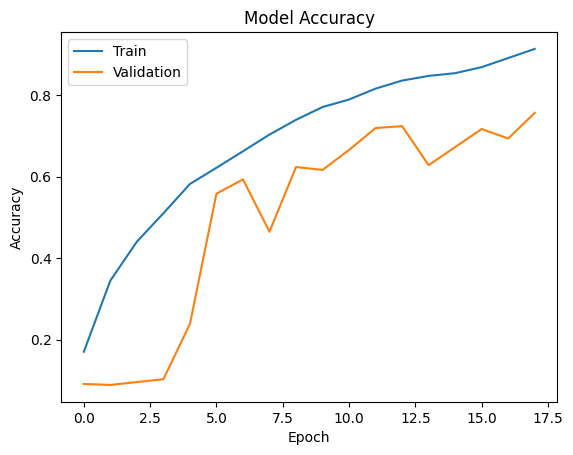

In [ ]:
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Best Model Accuracy with Least Loss**

In [ ]:
best_model_accuracy = history_3.history['accuracy'][np.argmin(history_3.history['loss'])]
best_model_accuracy

0.9139589071273804

In [ ]:
y_pred=model_3.predict(X_test_normalized)

15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 409ms/step


**Confusion Matrix**

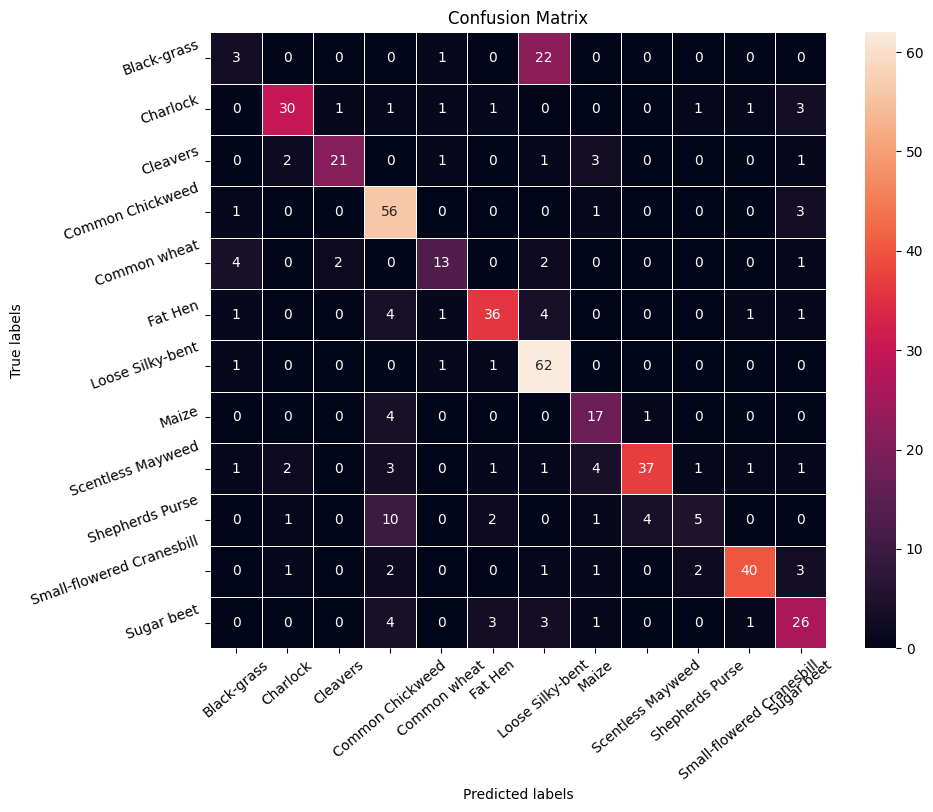

In [ ]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
# Setting the labels to both the axes
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(list(enc.classes_),rotation=40)
ax.yaxis.set_ticklabels(list(enc.classes_),rotation=20)
plt.show()

**Classification Report**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_arg, y_pred_arg))

              precision    recall  f1-score   support

           0       0.33      0.27      0.30        26
           1       0.66      0.90      0.76        39
           2       0.78      0.62      0.69        29
           3       0.84      0.89      0.86        61
           4       0.70      0.64      0.67        22
           5       0.90      0.79      0.84        48
           6       0.66      0.75      0.71        65
           7       0.65      0.91      0.75        22
           8       0.78      0.75      0.76        52
           9       0.43      0.39      0.41        23
          10       0.82      0.64      0.72        50
          11       0.81      0.79      0.80        38

    accuracy                           0.73       475
   macro avg       0.70      0.69      0.69       475
weighted avg       0.73      0.73      0.72       475



**Observations**



1.   Model 3 with early stopping and rate reduction shows the best performance among the other models.
2. The training accuracy is around 91% and validation accuracy is around 76%.
3. The accuracy for test data is around 73% and the difference between the accuracy of training and testing data has reduced, hence it generalizes well.
4. The model performs poorly for Black grass and classifies it as Loose silkly bent, but the accuracy for Shephard's Purse improves.



## Final Model

**Selecting best model**

From the above models, we conclude that **Model 3: CNN with Early stopping and Reduced Learning** seems to be the best model as it has highest validation/testing accuracy.
It has a test accuracy of 73% and the gap between training and validation performance is reduced, so the model seems to be generalizing well.

In [ ]:
best_model = model_3

### Visualizing the prediction

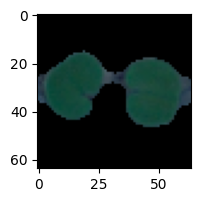

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Predicted Label ['Small-flowered Cranesbill']
True Label Small-flowered Cranesbill


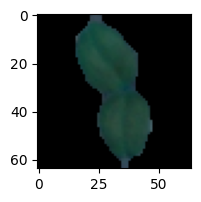

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Predicted Label ['Cleavers']
True Label Cleavers


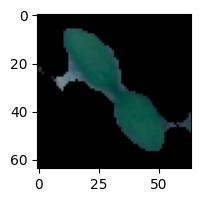

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Predicted Label ['Common Chickweed']
True Label Common Chickweed


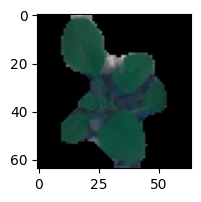

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Predicted Label ['Common Chickweed']
True Label Shepherds Purse


In [ ]:

# Visualizing the predicted and correct label of images from test data
plt.figure(figsize=(2,2))
plt.imshow(X_test[2])
plt.show()
## Complete the code to predict the test data using the final model selected
print('Predicted Label', enc.inverse_transform(best_model.predict((X_test_normalized[2].reshape(1,64,64,3)))))   # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[2])                                               # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[33])
plt.show()
## Complete the code to predict the test data using the final model selected
print('Predicted Label', enc.inverse_transform(best_model.predict((X_test_normalized[33].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[33])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[59],)
plt.show()
## Complete the code to predict the test data using the final model selected
print('Predicted Label', enc.inverse_transform(best_model.predict((X_test_normalized[59].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[59])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[36])
plt.show()
## Complete the code to predict the test data using the final model selected
print('Predicted Label', enc.inverse_transform(best_model.predict((X_test_normalized[36].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[36])                                              # using inverse_transform() to get the output label from the output vector

**Conclusion**

* Model 3 CNN model with Early stopping and Reduced Learning rate performs the best among the models built.
* Model with Data Augmentation didn't help in improving performance, it has lower validation (0.74) and testing accuracy (0.72) than Model 3, though it was more balanced model(lower gap between training and validation performance) but was likely underfitting the data.
* Model 1 & Model 1_1 had high training accuracy and were overfitting but the CNN was performing poorly for validation data.

## Actionable Insights and Business Recommendations


* We can try improving accuracy and reducing the gap between training and validation accuracy even further by tuning the hyperparameters such as:
  * Number of filters
  * Filter size
  * Activation function
  * Dropout ratio
* We can add increase drop out for fully connected layers and see if it helps in improving the performance or add multiple fully connected layers.
* The best model ( Model 3) still shows poor performance for Black grass and missclassfies as Loose silky bent, this maybe due to Loose Silky bent being the dominant class, we can add class weights to address this.
* This model can be deployed to identify plant species saving time compared to manual identification methods.
* AI powered tools can be made available as mobile apps, making them work on realtime plant species identification.
* Identifying weeds can help in early intervention and control them from affecting crop yield.



_____